<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/MultyClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)


4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
print(x_train[0].max(), x_train[0].min() )

255 0


In [4]:
val, _, count = tf.unique_with_counts(y_train)

In [5]:
dict(zip(val.numpy(), count.numpy()))

{9: 6000,
 0: 6000,
 3: 6000,
 2: 6000,
 7: 6000,
 5: 6000,
 1: 6000,
 6: 6000,
 4: 6000,
 8: 6000}

In [6]:
import matplotlib.pyplot as plt


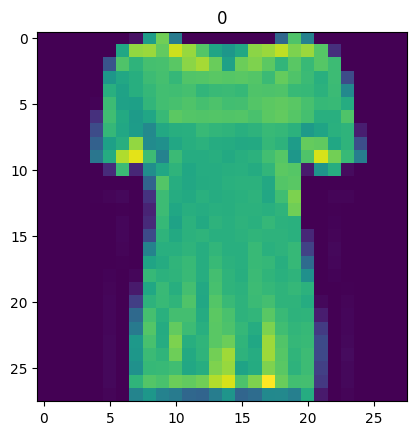

In [7]:
plt.imshow(x_train[10], label = y_train[10])
plt.title(y_train[10])
plt.show()

In [8]:
x_val = x_train[:5000]
x_train = x_train[5000:]

y_val = y_train[:5000]
y_train = y_train[5000:]

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(55000, 28, 28) (55000,) (5000, 28, 28) (5000,)


In [9]:
from keras.layers import Flatten, Dense
import numpy as np

In [21]:
def create_model (activation = 'relu', initializer = None, learning_rate = 0.001):
  tf.random.set_seed(42)
  np.random.seed(42)
  model = keras.models.Sequential(
      (Flatten(input_shape = [28, 28]),
      Dense(100, activation = activation, kernel_initializer=initializer),
      Dense(300, activation = activation, kernel_initializer=initializer),
      Dense(300, activation = activation, kernel_initializer=initializer),
      Dense(100, activation = activation, kernel_initializer=initializer),
      Dense(10, activation = 'softmax')
      )
  )
  model.compile(optimizer = keras.optimizers.Adam(learning_rate), loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
  return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 230,210
Trainable params: 230,210
Non-trai

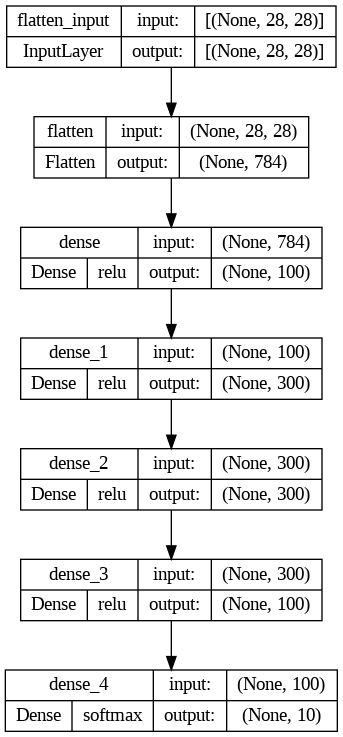

In [12]:
keras.utils.plot_model(model, show_shapes = True, show_layer_activations = True)

In [13]:
ES = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    callbacks=[ES],
    validation_data=(x_val, y_val),
    epochs=200)

Epoch 1/200
1719/1719 [==============================] - 14s 4ms/step - loss: 0.8816 - accuracy: 0.7665 - val_loss: 0.5109 - val_accuracy: 0.8202
Epoch 2/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4732 - accuracy: 0.8306 - val_loss: 0.4855 - val_accuracy: 0.8218
Epoch 3/200
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4315 - accuracy: 0.8437 - val_loss: 0.4041 - val_accuracy: 0.8616
Epoch 4/200
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4064 - accuracy: 0.8553 - val_loss: 0.4143 - val_accuracy: 0.8562
Epoch 5/200
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3933 - accuracy: 0.8577 - val_loss: 0.3755 - val_accuracy: 0.8690
Epoch 6/200
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 0.3891 - val_accuracy: 0.8658
Epoch 7/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3655 - accuracy: 0.8699 - val_loss: 0.3518 - val_

In [14]:
import pandas as pd

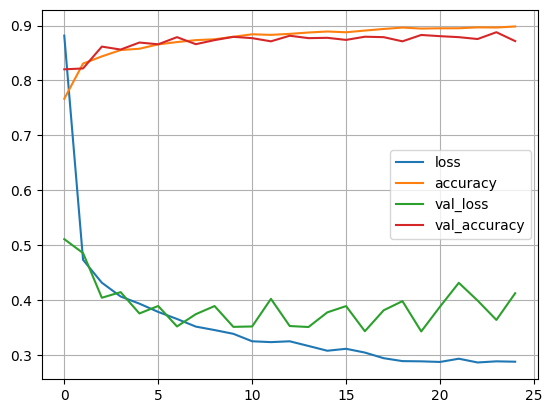

In [15]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8735


[0.40476009249687195, 0.8734999895095825]

## Apply normalization to data

In [17]:
x_train_norm = x_train/255.0
x_val_norm = x_val/255.0
x_test_norm = x_test/255.0


In [18]:
model2 = create_model()
history2 = model2.fit(
    x_train_norm, y_train,
    callbacks=[ES],
    validation_data=(x_val_norm, y_val),
    epochs=200)

Epoch 1/200
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5006 - accuracy: 0.8166 - val_loss: 0.3725 - val_accuracy: 0.8602
Epoch 2/200
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3750 - accuracy: 0.8624 - val_loss: 0.4143 - val_accuracy: 0.8536
Epoch 3/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3432 - accuracy: 0.8732 - val_loss: 0.3267 - val_accuracy: 0.8820
Epoch 4/200
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3168 - accuracy: 0.8826 - val_loss: 0.3048 - val_accuracy: 0.8894
Epoch 5/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2997 - accuracy: 0.8884 - val_loss: 0.3241 - val_accuracy: 0.8850
Epoch 6/200
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2841 - accuracy: 0.8953 - val_loss: 0.3209 - val_accuracy: 0.8840
Epoch 7/200
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2752 - accuracy: 0.8982 - val_loss: 0.3239 - val_ac

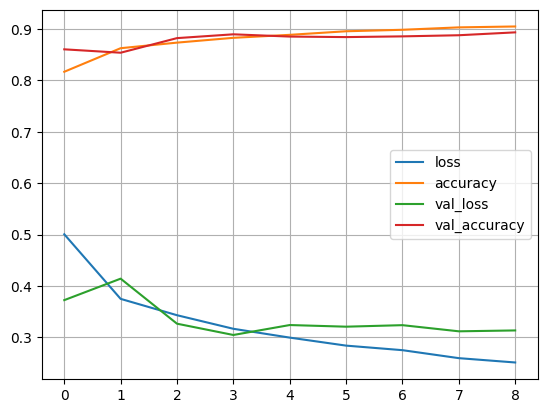

In [19]:
pd.DataFrame(history2.history).plot()
plt.grid(True)
plt.show()

In [20]:
model2.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8758


[0.34723785519599915, 0.8758000135421753]

### Choose learning rate

In [24]:
LRS = keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10**(epoch/20) )

In [25]:
model3 = create_model()
history3 = model3.fit(
    x_train_norm, y_train,
    callbacks=[LRS],
    validation_data=(x_val_norm, y_val),
    epochs=100)

Epoch 1/100
1719/1719 [==============================] - 11s 5ms/step - loss: 0.5024 - accuracy: 0.8171 - val_loss: 0.3929 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3811 - accuracy: 0.8593 - val_loss: 0.4013 - val_accuracy: 0.8602 - lr: 0.0011
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3556 - accuracy: 0.8693 - val_loss: 0.3637 - val_accuracy: 0.8696 - lr: 0.0013
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3367 - accuracy: 0.8765 - val_loss: 0.3430 - val_accuracy: 0.8786 - lr: 0.0014
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3274 - accuracy: 0.8800 - val_loss: 0.3443 - val_accuracy: 0.8682 - lr: 0.0016
Epoch 6/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3221 - accuracy: 0.8832 - val_loss: 0.3358 - val_accuracy: 0.8794 - lr: 0.0018
Epoch 7/100
1719/1719 [===========================

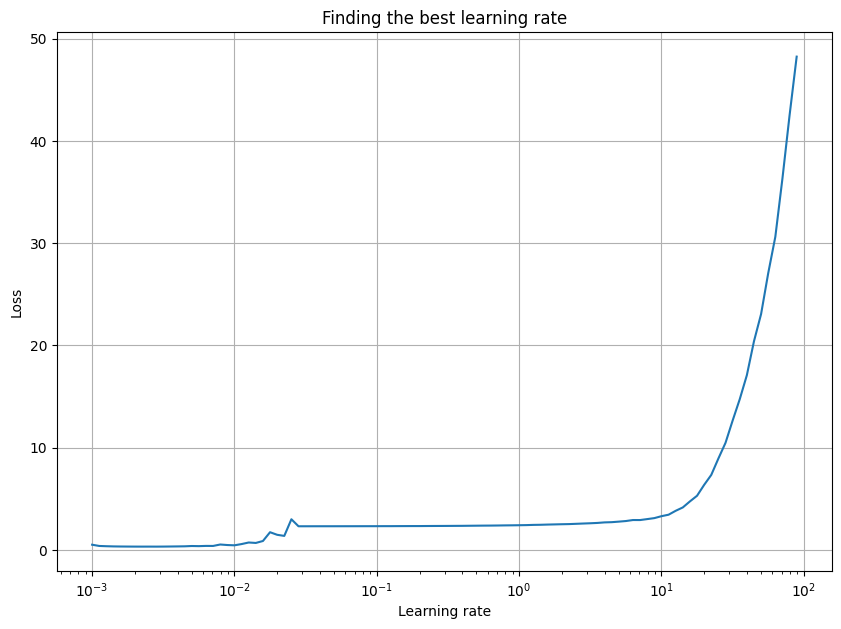

In [27]:
plt.figure(figsize = (10,7))
plt.semilogx(history3.history['lr'], history3.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.title('Finding the best learning rate')
plt.grid(True)
plt.show()

In [28]:
model4 = create_model(learning_rate = 0.00075)
history4 = model4.fit(
    x_train_norm, y_train,
    callbacks=[ES],
    validation_data=(x_val_norm, y_val),
    epochs=100)

Epoch 1/100
1719/1719 [==============================] - 10s 5ms/step - loss: 0.5076 - accuracy: 0.8138 - val_loss: 0.3775 - val_accuracy: 0.8622
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3740 - accuracy: 0.8632 - val_loss: 0.3884 - val_accuracy: 0.8596
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3389 - accuracy: 0.8735 - val_loss: 0.3276 - val_accuracy: 0.8780
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3121 - accuracy: 0.8848 - val_loss: 0.3078 - val_accuracy: 0.8858
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2951 - accuracy: 0.8910 - val_loss: 0.3190 - val_accuracy: 0.8804
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2801 - accuracy: 0.8952 - val_loss: 0.3214 - val_accuracy: 0.8886
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2675 - accuracy: 0.9003 - val_loss: 0.3003 - val_a

In [32]:
model4.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8816


[0.33373281359672546, 0.881600022315979]

In [35]:
prediction = model4.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


In [37]:
prediction.shape

(10000, 10)

In [39]:
label_prediction = prediction.argmax(axis = 1)
label_prediction[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

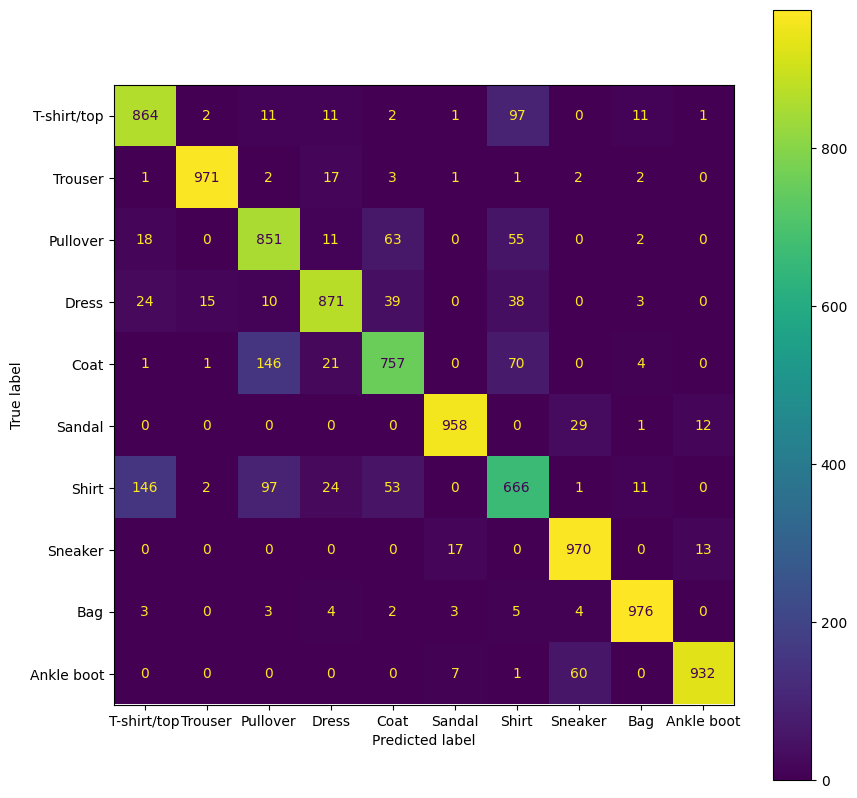

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize=(10,10))
cmx = confusion_matrix(y_test, label_prediction)
cmx_plot = ConfusionMatrixDisplay(cmx, display_labels = class_names)
cmx_plot.plot(ax=ax)

In [65]:
def plot_random_image(image_data, predictions, y_trues, percents):
  i = np.random.randint(0, len(image_data))
  plt.figure(figsize = (7,7))
  plt.imshow(image_data[i])
  plt.title(f" True is {class_names[y_trues[i]]}, prediction is {class_names[predictions[i]]}, {max(percents[i])*100:.2f} %")
  plt.show()



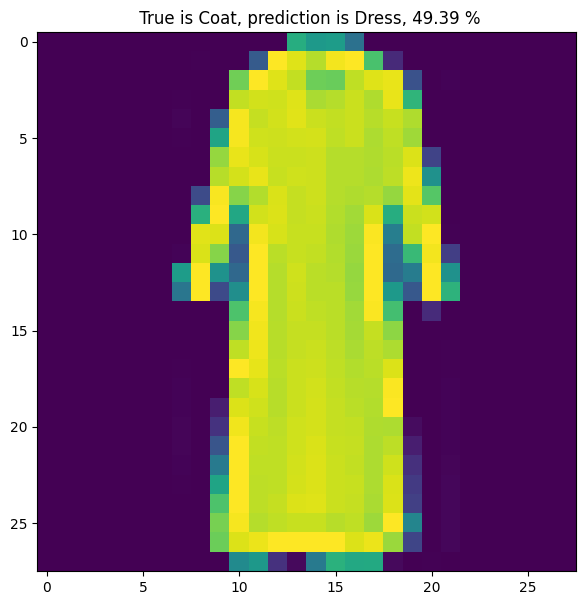

In [76]:
plot_random_image(x_test, label_prediction, y_test, prediction)